In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline
sns.set(color_codes=True)

In [6]:
df = pd.read_csv("/Volumes/MD/trips_extracted.csv")

In [7]:
len(df.index)

100717116

In [8]:
df.dropna(inplace=True)
len(df.index)

100501503

In [9]:
df = df[(df.DISTANCE > 0) & (df.DURATION > 0)]
len(df.index)

100455382

In [10]:
df

,DURATION,DISTANCE,FARE,IS_POOLED,TRIPS_POOLED
0,795.0,2.7,5.05,True,2
1,164.0,0.8,5.00,True,1
2,334.0,1.0,7.55,False,1
3,1136.0,6.1,15.00,False,1
4,900.0,5.7,12.55,False,1
...,...,...,...,...,...
100717111,781.0,5.7,10.05,True,2
100717112,286.0,0.5,15.05,False,1
100717113,540.0,0.8,8.17,True,3
100717114,919.0,4.0,7.55,True,2


## Stats of the columns

In [11]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, "f")))

,DURATION,DISTANCE,FARE,TRIPS_POOLED
count,100455382.000000,100455382.000000,100455382.000000,100455382.000000
mean,1095.009311,6.126847,15.140848,1.273039
std,789.655795,6.839472,11.632188,0.744431
min,2.000000,0.100000,0.000000,1.000000
25%,544.000000,1.800000,7.550000,1.000000
50%,881.000000,3.700000,12.050000,1.000000
75%,1420.000000,7.600000,17.550000,1.000000
max,85080.000000,546.100000,1402.050000,24.000000


## Pearson correlation coefficient (p)

**For two set of data points X and Y,**

**p = 1 => Linear relationship (as X increases, Y increases)**

**p = -1 => Inverse relationsip (as X increases, Y decreases)**

**p = 0 => No relationship between X and Y**

*p>0 & p<1 => gives how strong the linear relationship is based on nearness to 1.*

*p<0 & p>-1 => gives how strong the inverse relationship is based on nearness to -1.*

In [12]:
df.corr()

,DURATION,DISTANCE,FARE,IS_POOLED,TRIPS_POOLED
DURATION,1.000000,0.811512,0.754338,0.092800,0.149661
DISTANCE,0.811512,1.000000,0.863326,0.006193,0.020634
FARE,0.754338,0.863326,1.000000,-0.215609,-0.167311
IS_POOLED,0.092800,0.006193,-0.215609,1.000000,0.670463
TRIPS_POOLED,0.149661,0.020634,-0.167311,0.670463,1.000000


## Random sampling of the data (100k records)

In [13]:
random_sample = df.sample(100000, random_state=7)

In [14]:
random_sample

,DURATION,DISTANCE,FARE,IS_POOLED,TRIPS_POOLED
54110367,1333.0,6.4,17.55,False,1
39228186,1259.0,1.8,0.72,True,1
58520216,512.0,3.9,5.00,True,1
68872428,423.0,2.1,7.55,False,1
76202854,1004.0,4.2,12.55,False,1
...,...,...,...,...,...
34307799,846.0,2.2,10.05,False,1
12841353,452.0,1.1,9.55,False,1
84682976,3523.0,14.3,27.55,False,1
55074658,708.0,1.8,10.05,False,1


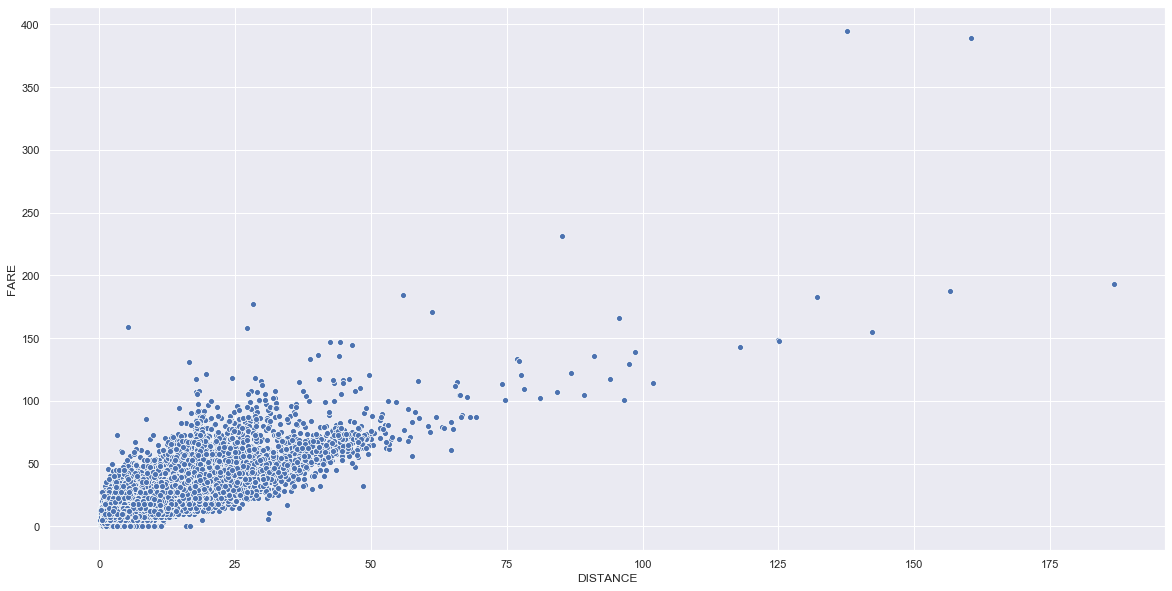

In [15]:
plt.figure(figsize=[20,10])
sns.scatterplot("DISTANCE", "FARE", data=random_sample)

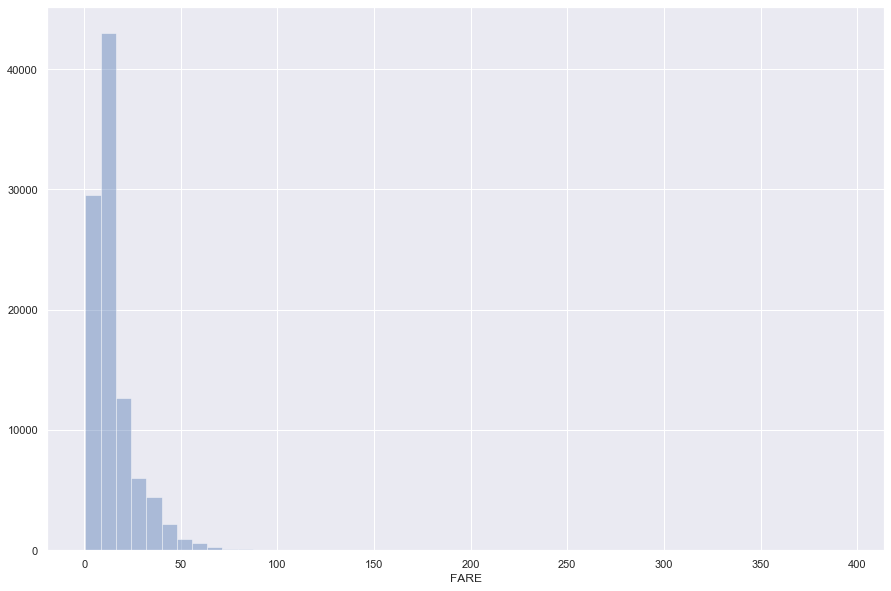

In [16]:
plt.figure(figsize=[15, 10])
sns.distplot(random_sample.FARE, kde=False)

In [17]:
random_sample.describe().apply(lambda s: s.apply(lambda x: format(x, "f")))

,DURATION,DISTANCE,FARE,TRIPS_POOLED
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1094.131520,6.109946,15.098450,1.273130
std,794.049428,6.782412,11.532785,0.747085
min,5.000000,0.100000,0.670000,1.000000
25%,541.000000,1.800000,7.550000,1.000000
50%,877.000000,3.700000,12.050000,1.000000
75%,1421.000000,7.600000,17.550000,1.000000
max,32348.000000,186.900000,394.450000,11.000000


In [18]:
random_sample.corr()

,DURATION,DISTANCE,FARE,IS_POOLED,TRIPS_POOLED
DURATION,1.000000,0.811097,0.759732,0.089429,0.145602
DISTANCE,0.811097,1.000000,0.864395,0.004428,0.018848
FARE,0.759732,0.864395,1.000000,-0.217962,-0.168441
IS_POOLED,0.089429,0.004428,-0.217962,1.000000,0.668058
TRIPS_POOLED,0.145602,0.018848,-0.168441,0.668058,1.000000


## Outlier Detection and Removal using z-score

In [19]:
from scipy import stats

In [20]:
random_sample[np.abs(stats.zscore(random_sample[["DURATION", "DISTANCE", "FARE"]])) > 3]

,DURATION,DISTANCE,FARE,IS_POOLED,TRIPS_POOLED
67141402,1711.0,14.5,52.05,False,1
61446376,2133.0,19.9,66.25,False,1
88091541,16928.0,17.9,35.05,True,2
52437083,2534.0,31.4,90.60,False,1
52437083,2534.0,31.4,90.60,False,1
...,...,...,...,...,...
66050023,2493.0,28.1,43.65,False,1
82504254,3724.0,19.3,37.55,False,1
73405296,4039.0,25.7,42.66,False,1
89989837,1498.0,22.0,52.20,False,1


**5555 Trips are outliers in the 100K sample**

-------------------------------------

## Scaling and removing outliers from a larger sample (1 million) using z-score

In [21]:
sample = df.sample(1000000, random_state=0)

In [22]:
fare_mean = sample.FARE.mean()
fare_stdv = sample.FARE.std()
print(f"Fare_Mean: {fare_mean}")
print(f"Fare_Stdv: {fare_stdv}")
threshold = 3 * fare_stdv
lower_bound, upper_bound = 0, fare_mean + threshold
print(f"Threshold: {threshold}")
print(f"Lower Boundary: {lower_bound}")
print(f"Upper Boundary: {upper_bound}")

Fare_Mean: 15.134123460000001
Fare_Stdv: 11.5982100647882
Threshold: 34.7946301943646
Lower Boundary: 0
Upper Boundary: 49.9287536543646


In [23]:
sample[(np.abs(stats.zscore(sample[["DURATION", "DISTANCE", "FARE"]])) > 3).all(axis=1)]

,DURATION,DISTANCE,FARE,IS_POOLED,TRIPS_POOLED
32618042,4644.0,45.2,93.20,False,1
15723702,3577.0,39.7,52.55,False,1
44061505,4422.0,29.0,52.55,False,1
24013340,3742.0,41.7,50.80,True,1
65241188,3587.0,41.8,68.02,False,1
...,...,...,...,...,...
12871077,3873.0,37.3,57.00,False,1
25819281,4476.0,26.9,53.30,False,1
51802947,5633.0,27.6,52.55,False,1
7318261,4252.0,42.8,75.60,False,1


**4,449 trips are outliers in the 25 million sample**

In [24]:
clean_df = sample[(np.abs(stats.zscore(sample[["DURATION", "DISTANCE", "FARE"]])) < 3).all(axis=1)]

In [25]:
clean_df

,DURATION,DISTANCE,FARE,IS_POOLED,TRIPS_POOLED
93888309,1131.0,3.8,12.50,False,1
28065100,816.0,2.0,13.05,False,1
59566034,755.0,1.5,10.05,False,1
48286561,231.0,1.1,7.55,False,1
73985101,489.0,1.4,8.55,False,1
...,...,...,...,...,...
74887955,360.0,0.9,5.72,False,1
88997637,426.0,3.4,12.05,False,1
24674897,782.0,2.7,10.05,False,1
71410930,451.0,1.2,7.55,False,1


**Total of 962,705 trips after cleaning outliers**

In [26]:
clean_df.describe().apply(lambda s: s.apply(lambda x: format(x, "f")))

,DURATION,DISTANCE,FARE,TRIPS_POOLED
count,962705.000000,962705.000000,962705.000000,962705.000000
mean,1010.771792,5.323332,13.695692,1.277437
std,636.816667,5.013243,8.284358,0.753383
min,3.000000,0.100000,0.670000,1.000000
25%,533.000000,1.800000,7.550000,1.000000
50%,852.000000,3.500000,10.600000,1.000000
75%,1339.000000,6.900000,16.000000,1.000000
max,3450.000000,26.600000,49.910000,24.000000


In [27]:
clean_df.corr()

,DURATION,DISTANCE,FARE,IS_POOLED,TRIPS_POOLED
DURATION,1.000000,0.807099,0.720275,0.134702,0.199882
DISTANCE,0.807099,1.000000,0.841301,0.044978,0.061162
FARE,0.720275,0.841301,1.000000,-0.246610,-0.190577
IS_POOLED,0.134702,0.044978,-0.246610,1.000000,0.668165
TRIPS_POOLED,0.199882,0.061162,-0.190577,0.668165,1.000000


In [28]:
print("Fare  ->", clean_df.FARE.min(), clean_df.FARE.max())
print("Duration  ->", clean_df.DURATION.min(), clean_df.DURATION.max())
print("Distance  ->", clean_df.DISTANCE.min(), clean_df.DISTANCE.max())

Fare  -> 0.67 49.91
Duration  -> 3.0 3450.0
Distance  -> 0.1 26.6


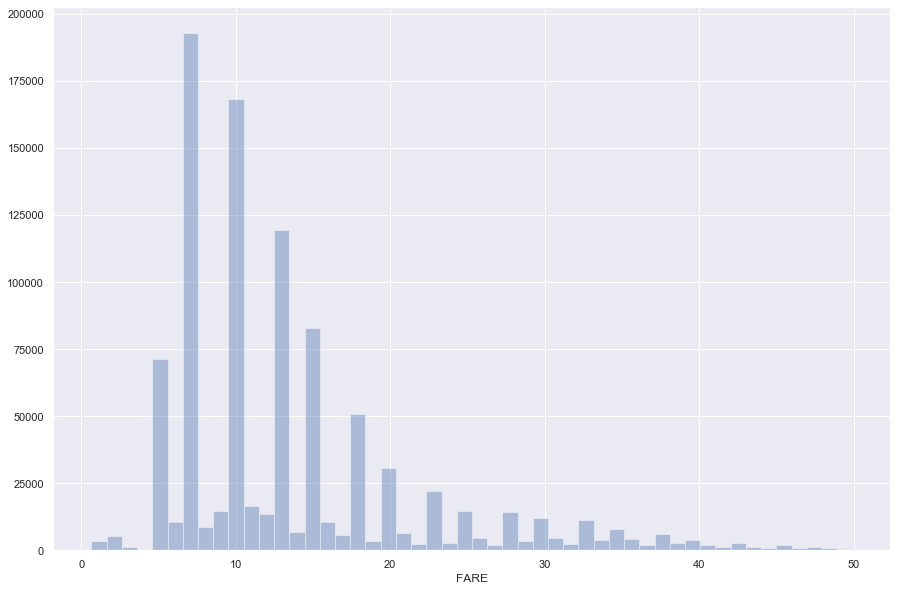

In [29]:
plt.figure(figsize=[15, 10])
sns.distplot(clean_df.FARE, kde=False)

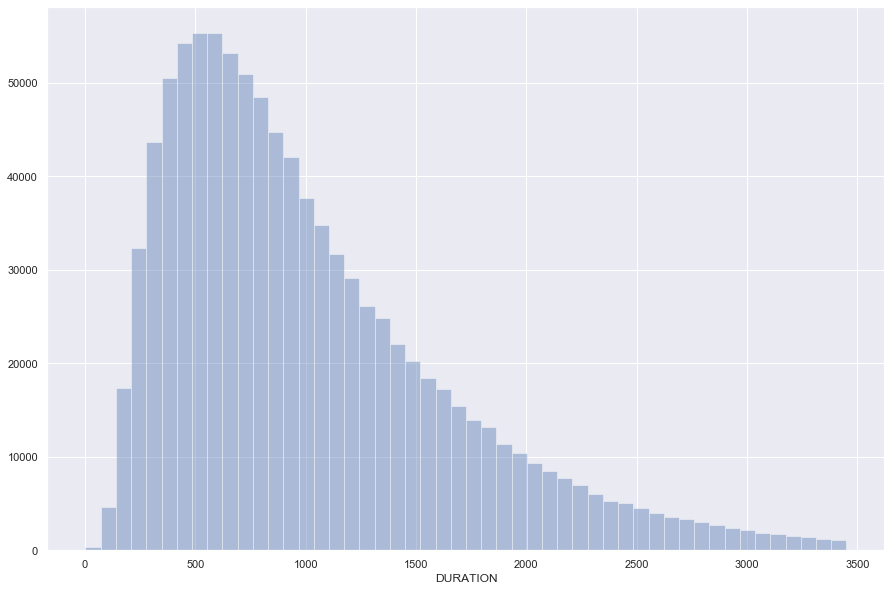

In [30]:
plt.figure(figsize=[15, 10])
sns.distplot(clean_df.DURATION, kde=False)

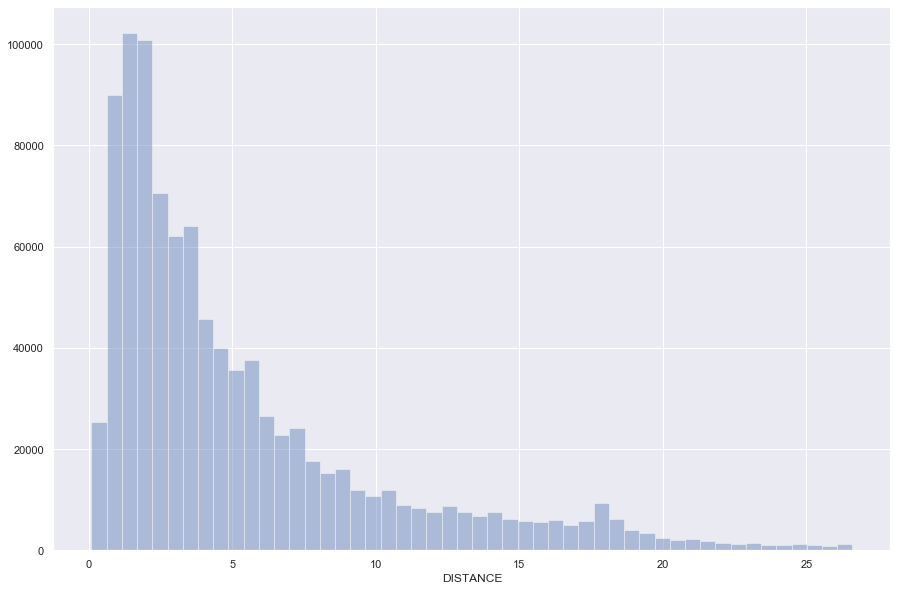

In [31]:
plt.figure(figsize=[15, 10])
sns.distplot(clean_df.DISTANCE, kde=False)

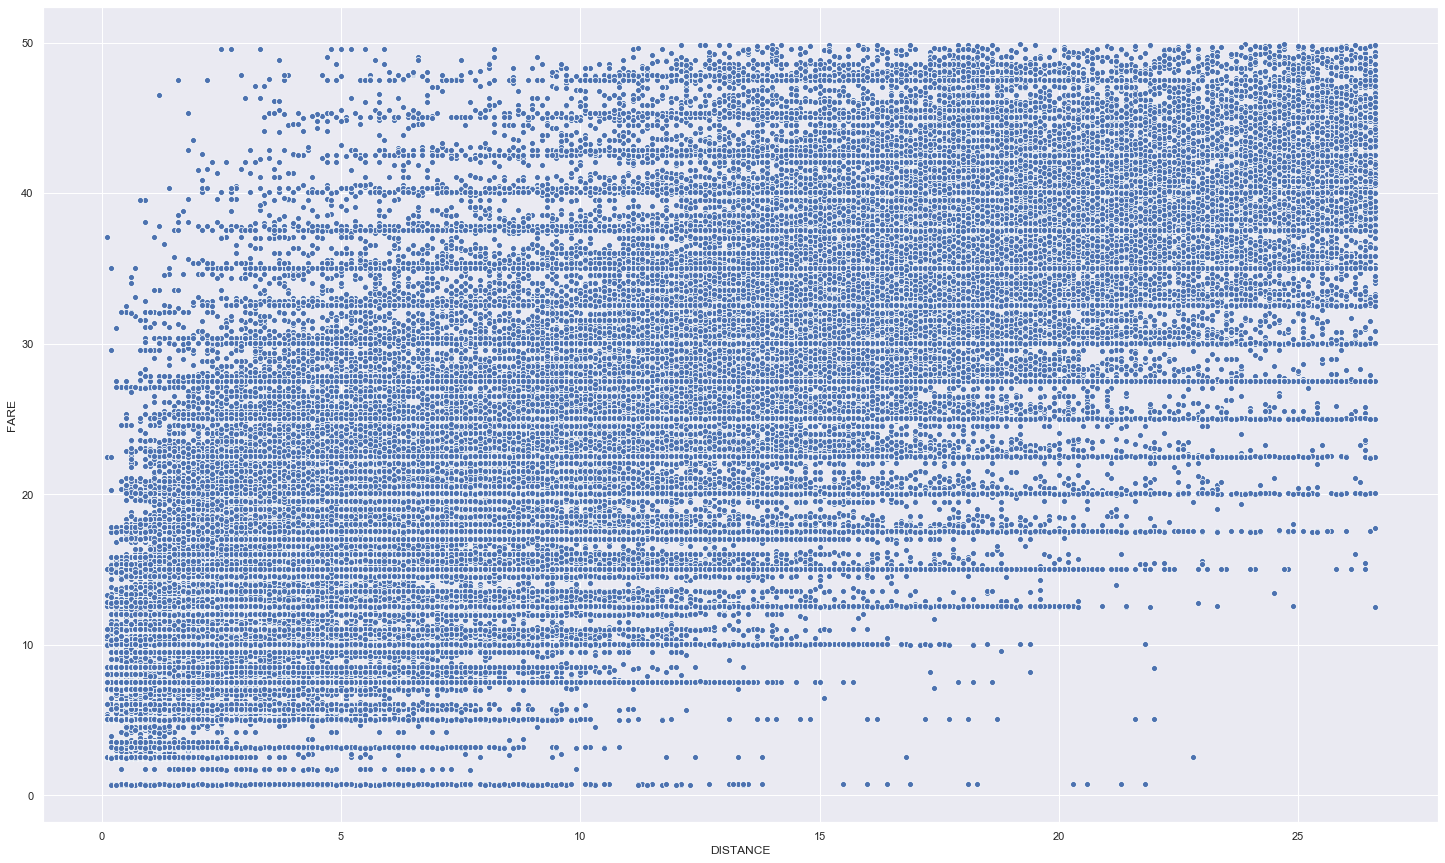

In [32]:
plt.figure(figsize=[25, 15])
sns.scatterplot(x="DISTANCE", y="FARE", data=clean_df)

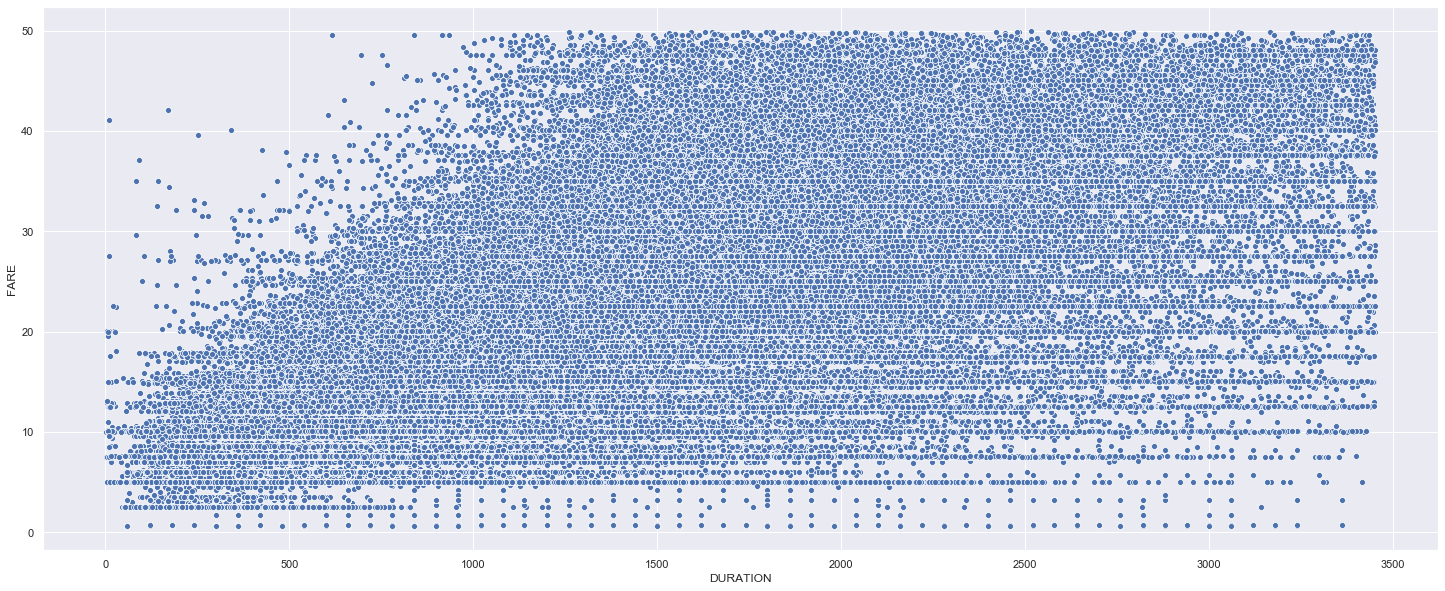

In [33]:
plt.figure(figsize=[25, 10])
sns.scatterplot(x="DURATION", y="FARE", data=clean_df)

In [34]:
clean_df.to_csv("trips_clean.csv", index=False)

In [35]:
random_sample = clean_df.sample(500, random_state=0)

In [36]:
random_sample.describe().apply(lambda s: s.apply(lambda x: format(x, "f")))

,DURATION,DISTANCE,FARE,TRIPS_POOLED
count,500.000000,500.000000,500.000000,500.000000
mean,1030.852000,5.405200,13.871580,1.266000
std,633.168052,4.983795,8.608650,0.675393
min,35.000000,0.200000,0.720000,1.000000
25%,562.750000,1.900000,7.550000,1.000000
50%,840.000000,3.650000,10.050000,1.000000
75%,1346.500000,6.800000,16.012500,1.000000
max,3373.000000,24.500000,47.500000,6.000000


In [37]:
random_sample.corr()

,DURATION,DISTANCE,FARE,IS_POOLED,TRIPS_POOLED
DURATION,1.000000,0.821348,0.709114,0.103429,0.216123
DISTANCE,0.821348,1.000000,0.848519,-0.010900,0.065614
FARE,0.709114,0.848519,1.000000,-0.294841,-0.201551
IS_POOLED,0.103429,-0.010900,-0.294841,1.000000,0.730895
TRIPS_POOLED,0.216123,0.065614,-0.201551,0.730895,1.000000


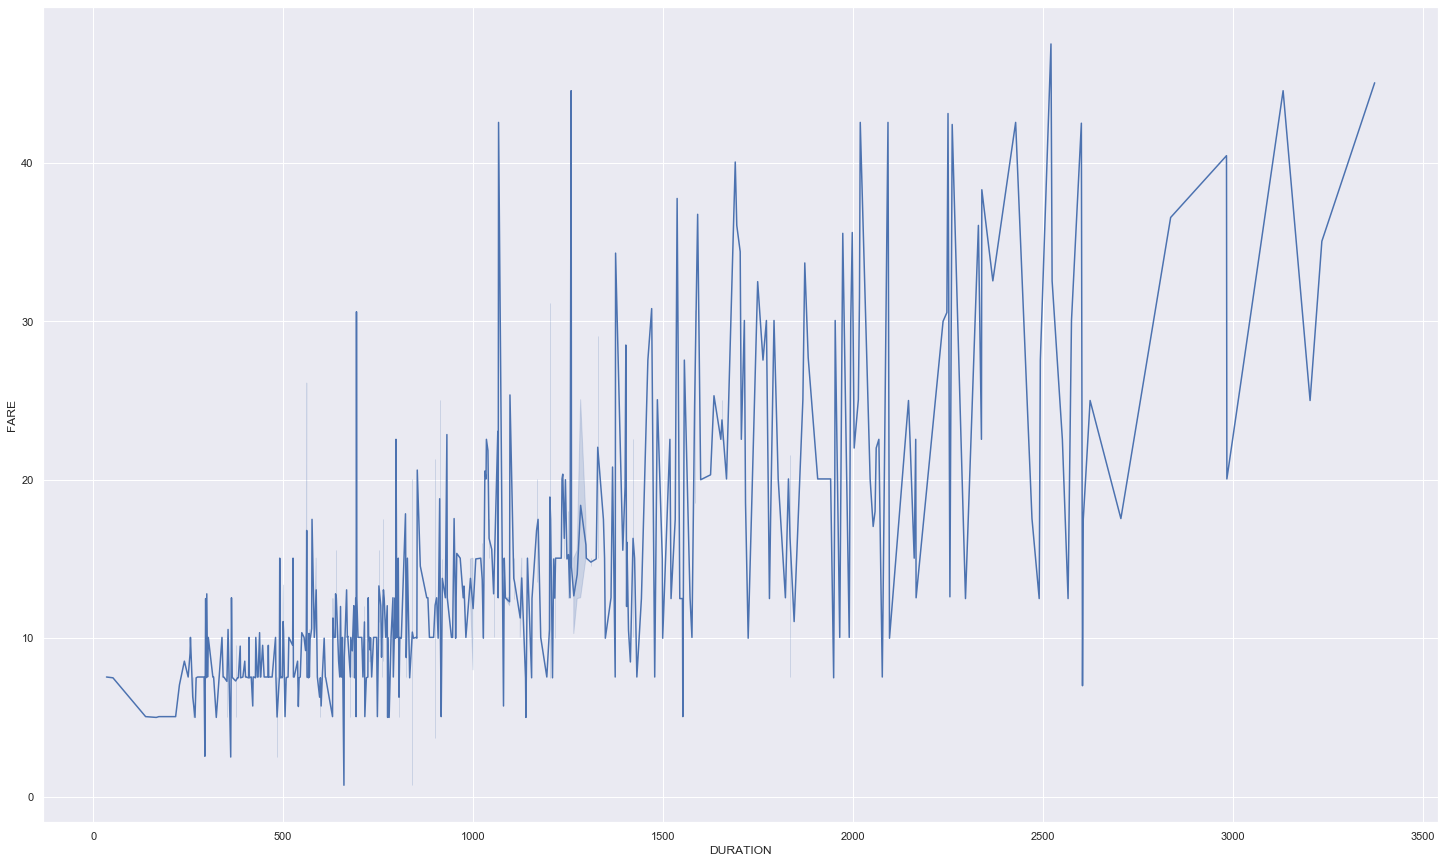

In [38]:
plt.figure(figsize=[25, 15])
sns.lineplot(x="DURATION", y="FARE", data=random_sample)

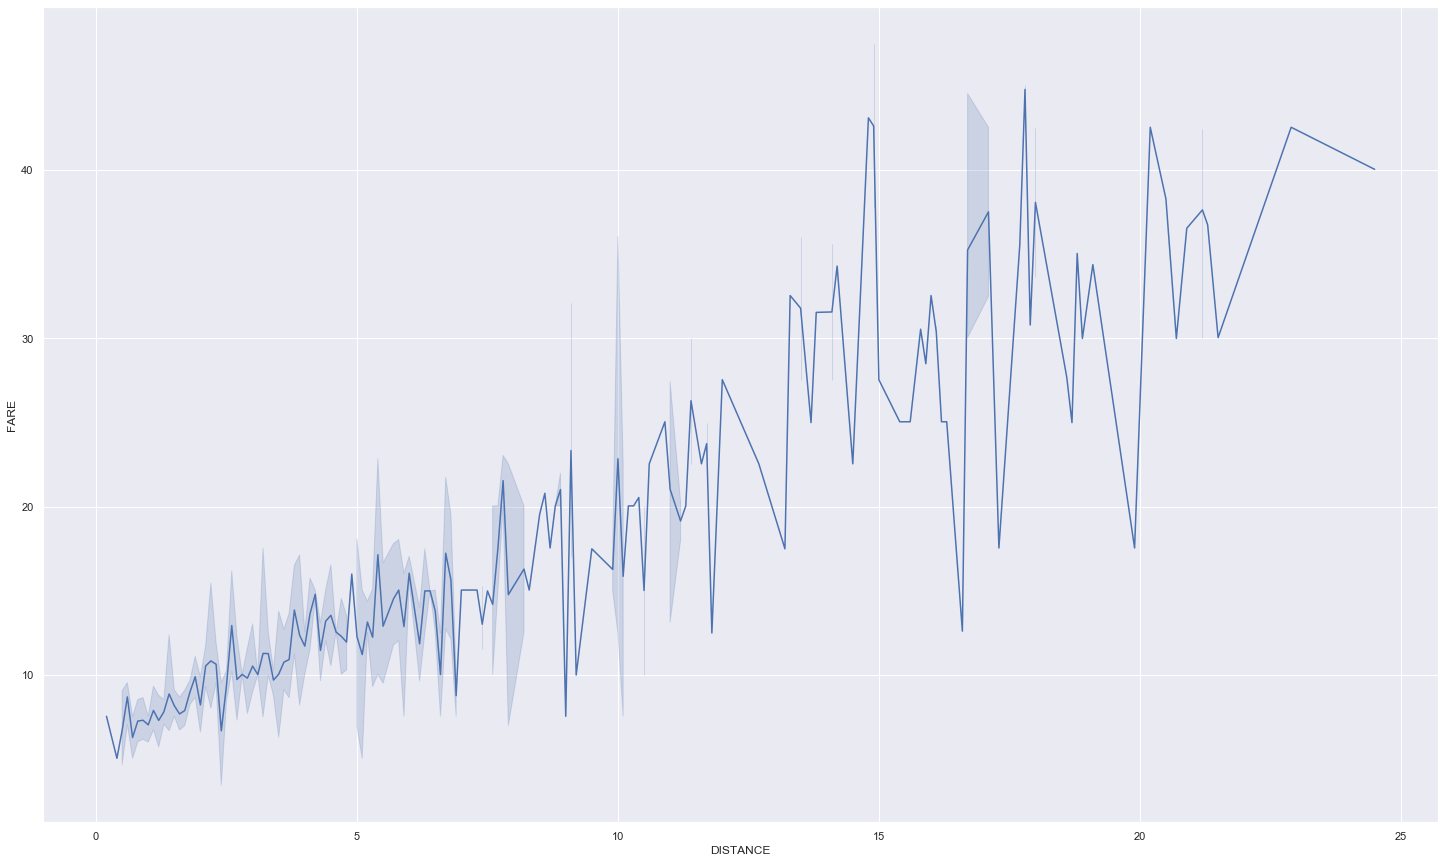

In [39]:
plt.figure(figsize=[25, 15])
sns.lineplot(x="DISTANCE", y="FARE", data=random_sample)